In [76]:
import numpy as np
import scipy as sp
import scipy.stats as stats
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
import pandas as pd
from collections import Counter

In [77]:
df1 = pd.read_csv('data/les5_ex1.csv')
df2 = pd.read_csv('data/les5_ex2.csv')

In [78]:
a = df2['x'].values
# a

In [79]:
b = df2['y'].values
# b

<AxesSubplot:>

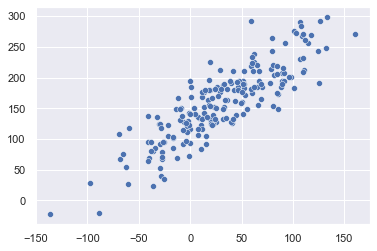

In [80]:
sns.scatterplot(x=a, y=b)

<AxesSubplot:ylabel='Count'>

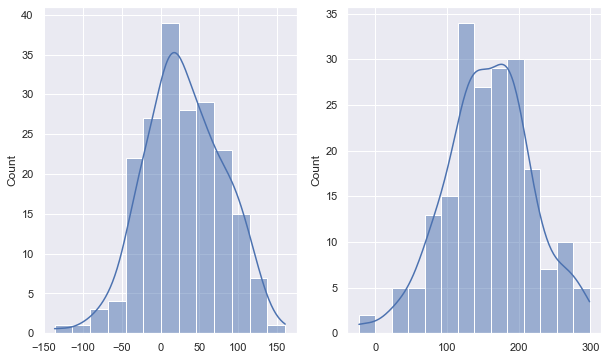

In [81]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.histplot(a, kde=True)
plt.subplot(1, 2, 2)
sns.histplot(b, kde=True)

### Ковариация

In [82]:
stats.tvar(a), stats.tvar(b)

(2518.160577889447, 3604.190954773869)

In [83]:
Sa = np.sqrt(stats.tvar(a))
Sb = np.sqrt(stats.tvar(b))
Sa, Sb, stats.tvar(a), stats.tvar(b)

(50.181277164789726, 60.03491446461691, 2518.160577889447, 3604.190954773869)

In [84]:
covar_matrix = np.cov(np.vstack([a, b]))
covar_matrix

array([[2518.16057789, 2600.55326633],
       [2600.55326633, 3604.19095477]])

In [85]:
#Ковариация
c = covar_matrix[0,1]
c

2600.553266331659

In [86]:
n = a.size
c1 = 1/(n-1) * ((a*b) - a.mean()*b.mean()).sum()
c1

2600.5532663316576

### Критерий, основанный на выборочном коэффициенте корреляции

#### H0 - коэффициент корреляции = 0 (то есть выборки независимы)
#### Ha - коэффициент корреляции != 0 (то есть выборки зависимы)

Реализуем критерий и сравним со значением из scipy

In [87]:
#Ручная реализация критерия
cov = c1

#коэффициент корреляции
r = cov / (Sa*Sb)
print(r,"коэффициент корреляции")

#значение статистики T
T = np.sqrt(n - 2) * r / np.sqrt(1 - r**2)
print(T, "значение статистики T")


#p-значение
p_value = 2 * (1 - stats.t.cdf(T if T>0 else -T, n-2))
print(p_value, "p-значение")

0.8632173229973711 коэффициент корреляции
24.060543650719488 значение статистики T
0.0 p-значение


In [88]:
#статистика и p-value из scipy
print((r, p_value))
print(stats.pearsonr(a, b))

(0.8632173229973711, 0.0)
(0.8632173229973711, 1.0948787480632233e-60)


### Критерий Кендалла 

Реализуем критерий и сравним со значением из scipy

In [89]:
# функция для вычисления u1, u2 при наличии связок
def kendal_u(rank_list):
    c = Counter(rank_list)
    q = [i for i in c.values() if i>1]
    u = 0
    for el in q:
        u += el * (el-1)
    return u / 2

In [90]:
#Ручная реализация критерия

#числитель
x = stats.rankdata(a)
y = stats.rankdata(b)
t_sum = 0

for i in range(n):
    for j in range(n):
        if i<j:
            t_sum += np.sign((x[i]-x[j])*(y[i]-y[j]))
print(t_sum)

t_d = np.sqrt(n*(n-1)/2 - kendal_u(x)) * np.sqrt(n*(n-1)/2 - kendal_u(y))
print(t_d)

#коэффициент корреляции
tau = t_sum / t_d
print(tau, "коэффициент корреляции")


t_D = (4*n + 10) / (9*n*(n-1))

#значение статистики T
T = tau / np.sqrt(t_D)
print(T, "значение статистики T")


#p-значение
p_value = 2 * (1 - stats.norm.cdf(T if T>0 else -T))
print(p_value, "p-значение")

13333.0
19791.498174721386
0.6736731035869494 коэффициент корреляции
14.16672585468405 значение статистики T
0.0 p-значение


In [91]:
#статистика и p-value из scipy
ck, pk = stats.kendalltau(a, b)
print(tau, p_value)
print(ck,pk)

0.6736731035869494 0.0
0.6736731035869494 4.274343736443343e-45


### Критерий Спирмена

Реализуем критерий и сравним со значением из scipy

In [92]:
#Ручная реализация критерия
t_sum = 0
t1_sum = 0
t2_sum = 0

for i in range(n):
    t_sum += (x[i] - x.mean()) * (y[i] - y.mean())
    t1_sum += (x[i] - x.mean())**2
    t2_sum += (y[i] - y.mean())**2

#коэффициент корреляции
rho = t_sum / np.sqrt(t1_sum * t2_sum)
print(rho, "коэффициент корреляции")

#значение статистики T
T = np.sqrt(n-1) * rho
print(T, "значение статистики T")


#p-значение
p_value = 2 * (1 - stats.norm.cdf(T if T>0 else -T))
print(p_value, "p-значение")

0.8600454414048687 коэффициент корреляции
12.13243397241369 значение статистики T
0.0 p-значение


In [93]:
#статистика и p-value из scipy
cor_sp, p_sp = stats.spearmanr(a, b)
cor_sp2, p_sp2 = stats.pearsonr(x, y)
print(cor_sp, p_sp)
print(cor_sp2, p_sp2)
print(rho, p_value)

0.8600454414048686 8.981037231952853e-60
0.8600454414048685 8.981037231954176e-60
0.8600454414048687 0.0


In [94]:
alpha = 0.05
if p_value>alpha:
    print("Принимаем H0")
else:
    print("Отказываемся от H0 в пользу альтернативной гипотезы")

Отказываемся от H0 в пользу альтернативной гипотезы
